<a href="https://colab.research.google.com/github/bmmcc4/MI-462-Pytorch/blob/main/MI_462_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MI-462 Applied AI Platforms & Projects**
Bradley McAllister

In [105]:
# Clone Repo with data file
!git clone https://github.com/bmmcc4/MI-462-Pytorch.git

Cloning into 'MI-462-Pytorch'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [226]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

In [106]:
# Download
files.download('MI-462-Pytorch/Electricity_Production_By_Source.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
# Save into DataFrame
df = pd.read_csv('MI-462-Pytorch/Electricity_Production_By_Source.csv')

In [110]:
df.describe('')

,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh)
count,6241.000000,5221.000000,5221.000000,6241.000000,6206.000000,6241.000000,5221.000000,6241.000000,6241.000000
mean,2005.509534,142.853733,75.472403,53.165487,5.851306,2.014825,26.110770,6.316172,46.874202
std,9.299156,712.455843,342.984190,257.725337,32.334128,21.726406,110.222772,51.570081,227.223144
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.000000,1.056576,1.957000,0.010000,0.000000,1.003232,0.000000,0.000000
max,2020.000000,9345.340997,5943.112329,4355.041636,702.887552,844.385951,1364.578206,1590.189440,2720.674471


In [112]:
# One quantitative variable
df['Electricity from coal (TWh)'].describe()

count    5221.000000
mean      142.853733
std       712.455843
min         0.000000
25%         0.000000
50%         0.000000
75%        18.458000
max      9345.340997
Name: Electricity from coal (TWh), dtype: float64

I think it is useful to compare the average (mean) electricity produced from non-renewable sources such as coal to renewable sources such as solar. It is seen that most electricity in the world is produced from coal. Renewable sources are seen here to generally be used less than non-renewable sources in the production of electricity. I think grouping by the catagorical variable "Country" would provide more granular data to investigate what countries are utilizating what resources. As well, examining the average number for all sources for all countries over the years will provide a deeper look into the average number found in the result of the describe method. However, since average can be affected by things such as zeros, Nulls, or Outliers it is important to handle those before analysis.

In [191]:
# Group
df_grouped = df.groupby(['Entity'], as_index=False).mean()

In [192]:
df_grouped

,Entity,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh)
0,Afghanistan,2009.5,0.000000,0.192800,0.728800,0.000000,0.013670,0.000000,0.000016,0.000000
1,Africa,2002.0,214.756396,145.410151,84.308507,2.951156,1.400565,54.662103,2.540144,11.559217
2,Albania,2009.5,0.000000,0.000000,5.176417,0.000000,0.001560,0.046859,0.000000,0.000000
3,Algeria,2002.0,0.000000,45.529715,0.243729,0.000000,0.055300,0.000000,0.002257,0.000000
4,American Samoa,2009.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.167950,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
230,Western Sahara,2009.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.043000,0.000000,0.000000
231,World,2002.5,6524.920720,3365.465344,2929.620291,300.927617,103.526632,1199.250478,309.755494,2377.945719
232,Yemen,2009.5,0.000000,1.038660,0.000000,0.000000,0.070900,3.966437,0.000000,0.000000
233,Zambia,2009.5,0.234530,0.000000,10.582979,0.055819,0.000747,0.219881,0.000000,0.000000


It is seen that some countries have zeros for their average electricty from different sources. These would be affecting the overall mean. Lets remove the zeros as they have the greatest impact on the mean. Most likely, they are not recorded values as every country should have some electricity production since the dataset has values starting in 1985.

In [201]:
df_zero_removed = df[df['Electricity from coal (TWh)']!=0]
df_zero_removed = df_zero_removed[df_zero_removed['Electricity from gas (TWh)']!=0]
df_zero_removed = df_zero_removed[df_zero_removed['Electricity from hydro (TWh)']!=0]
df_zero_removed = df_zero_removed[df_zero_removed['Electricity from other renewables (TWh)']!=0]
df_zero_removed = df_zero_removed[df_zero_removed['Electricity from solar (TWh)']!=0]
df_zero_removed = df_zero_removed[df_zero_removed['Electricity from oil (TWh)']!=0]
df_zero_removed = df_zero_removed[df_zero_removed['Electricity from wind (TWh)']!=0]
df_zero_removed = df_zero_removed[df_zero_removed['Electricity from nuclear (TWh)']!=0]

In [210]:
df_zero_removed.describe()

,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh)
count,861.000000,833.000000,833.000000,861.000000,861.000000,861.000000,833.000000,861.000000,861.000000
mean,2007.614402,807.529734,369.340501,310.735130,38.241774,13.866241,116.218341,43.954780,313.984903
std,8.612321,1625.073064,784.123498,629.611779,79.318322,57.039129,249.492596,132.797525,536.854832
min,1985.000000,0.090900,0.001030,0.057000,0.003500,0.000007,0.005837,0.000490,0.111111
25%,2001.000000,22.889000,21.884000,12.838601,2.157000,0.010105,5.826373,0.269000,15.170000
50%,2009.000000,116.962366,76.574269,65.851684,7.532763,0.254961,23.109876,2.177000,63.028000
75%,2015.000000,859.170822,410.272061,351.567109,46.660000,2.358881,120.304257,19.847122,421.076000
max,2020.000000,9345.340997,5943.112329,4355.041636,702.887552,844.385951,1364.578206,1590.189440,2720.674471


It is seen that the mean for all sources has been raised greatly by removing the zeros. There are no zeros present in the min statistic. I believe these values to be more accurate.

Now with accurate data we can perform a true analysis.

In [211]:
# Group
df_zero_removed_grouped = df_zero_removed.groupby(['Entity'], as_index=False).mean()

In [212]:
top_five_coal_produced = df_zero_removed_grouped.sort_values('Electricity from coal (TWh)', ascending=False)
top_five_coal_produced = top_five_coal_produced[top_five_coal_produced['Entity']!='World'][:5]

In [216]:
top_five_hydro_produced = df_zero_removed_grouped.sort_values('Electricity from hydro (TWh)', ascending=False)
top_five_hydro_produced = top_five_hydro_produced[top_five_hydro_produced['Entity']!='World'][:5]

In [217]:
top_five_coal_produced

,Entity,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh)
2,Asia Pacific,2004.500000,3691.044309,860.247030,886.222389,80.961214,43.884174,361.161075,94.916325,462.320473
8,China,2006.500000,2450.931260,78.770032,594.639505,26.880755,32.946036,71.823478,91.126476,96.018607
23,North America,2002.000000,1912.753984,921.259538,652.603791,81.875589,14.105459,161.880466,73.530467,833.968156
39,United States,2002.500000,1698.028763,789.226508,276.141708,65.981282,15.574149,92.144920,71.447699,716.944932
12,Europe,2002.441176,1073.986742,556.917175,577.958056,85.924634,29.439701,170.283230,109.271511,984.554609


In [218]:
top_five_hydro_produced

,Entity,Year,Electricity from coal (TWh),Electricity from gas (TWh),Electricity from hydro (TWh),Electricity from other renewables (TWh),Electricity from solar (TWh),Electricity from oil (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh)
2,Asia Pacific,2004.500000,3691.044309,860.247030,886.222389,80.961214,43.884174,361.161075,94.916325,462.320473
23,North America,2002.000000,1912.753984,921.259538,652.603791,81.875589,14.105459,161.880466,73.530467,833.968156
30,South & Central America,2008.500000,46.910032,167.761570,646.865271,43.152112,2.185260,125.583162,15.024289,19.973492
8,China,2006.500000,2450.931260,78.770032,594.639505,26.880755,32.946036,71.823478,91.126476,96.018607
12,Europe,2002.441176,1073.986742,556.917175,577.958056,85.924634,29.439701,170.283230,109.271511,984.554609


I decided to compare average coal sourced electricity production to a renewable source of hydropower. I grouped by the country to see what country or group of countries leads in producing electricity from both a renewable and non-renewable resource. The Asia Pacific group of countries came out as the leader for both. Asia-Pacific could be using its hilly terrian to build dams to capture hydro electric power. Now, I will graph a yearly timeline of the production of electricity from coal in Asia Pacific and compare to a graph of a early timeline of the production of electricity from hydro in Asia Pacific. I would expect to see the use of coal as a source to start to be going down and the use of hydro to be going up.

In [221]:
asia_pacific = df_zero_removed[df_zero_removed['Entity']=='Asia Pacific']

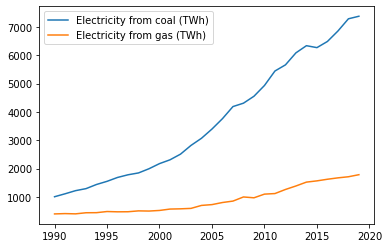

In [222]:
plt.plot(asia_pacific['Year'], asia_pacific['Electricity from coal (TWh)'])
plt.plot(asia_pacific['Year'], asia_pacific['Electricity from hydro (TWh)'])
plt.legend(['Electricity from coal (TWh)', 'Electricity from gas (TWh)', 'Electricity from hydro (TWh)'])

It is seen in the graph that both sources are rising, Coal is rising much faster however, at the very top it looks to be flatting out. Hydro power sources are rising however, not as fast as coal. Largely because coal is cheap and availible at this time.

I also will conduct an analyst of all the sources of electricity over the years for all countries. This will help to understand the average number present in the describe method.

In [223]:
# Group
grouped_by_year = df_zero_removed.groupby('Year', as_index=False).mean()

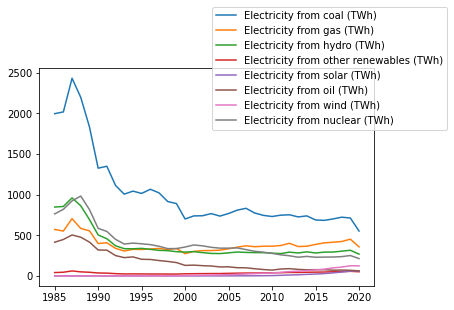

In [224]:
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from coal (TWh)'])
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from gas (TWh)'])
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from hydro (TWh)'])
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from other renewables (TWh)'])
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from solar (TWh)'])
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from oil (TWh)'])
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from wind (TWh)'])
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from nuclear (TWh)'])
plt.legend(['Electricity from coal (TWh)', 'Electricity from gas (TWh)', 'Electricity from hydro (TWh)', 'Electricity from other renewables (TWh)', 'Electricity from solar (TWh)', 'Electricity from oil (TWh)', 'Electricity from wind (TWh)', 'Electricity from nuclear (TWh)'], loc='center left', bbox_to_anchor=(.5, 1))

The graph shows that Coal continues to be on the top for all countries for all years. Mostly because of its abundence and effeciency with creating electricity. However, renewable sources are rising while coal and other non-renewables are decreasing. 

To prove removing the zeros presented more accurate numbers I will preform an anlysis of all sources for all countries over the years withour removing the zeros.

In [228]:
# Group
grouped_by_year = df.groupby('Year', as_index=False).mean()

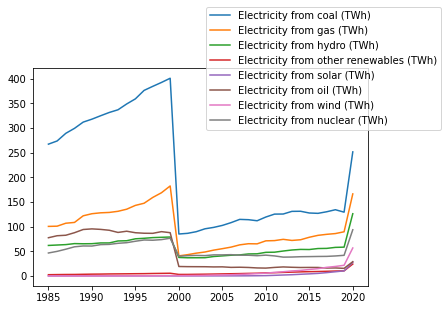

In [229]:
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from coal (TWh)'])
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from gas (TWh)'])
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from hydro (TWh)'])
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from other renewables (TWh)'])
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from solar (TWh)'])
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from oil (TWh)'])
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from wind (TWh)'])
plt.plot(grouped_by_year['Year'], grouped_by_year['Electricity from nuclear (TWh)'])
plt.legend(['Electricity from coal (TWh)', 'Electricity from gas (TWh)', 'Electricity from hydro (TWh)', 'Electricity from other renewables (TWh)', 'Electricity from solar (TWh)', 'Electricity from oil (TWh)', 'Electricity from wind (TWh)', 'Electricity from nuclear (TWh)'], loc='center left', bbox_to_anchor=(.5, 1))

This graph does not have any true trends. There is a large drop off in 2000 as well as a sharp increase in recent year. 